In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("./Ames_outliers_removed.csv")
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [19]:
df.drop("PID",axis=1,inplace=True)
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       5     2010        WD           Normal     215000  
1          NaN        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3          NaN        0       4     2010        WD           Normal     244000  
4          NaN        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [21]:
null_sort_df = df.isnull().sum().sort_values(ascending=False)

In [22]:
(null_sort_df / len(df)) * 100

Pool QC         99.590024
Misc Feature    96.412709
Alley           93.235395
Fence           80.457807
Mas Vnr Type    60.642296
                  ...    
Heating QC       0.000000
MS Zoning        0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [23]:
def percent_missing(df):
    p_nan = df.isnull().sum() / len(df) * 100
    p_nan= p_nan[p_nan > 0].sort_values(ascending=False)
    return p_nan
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64

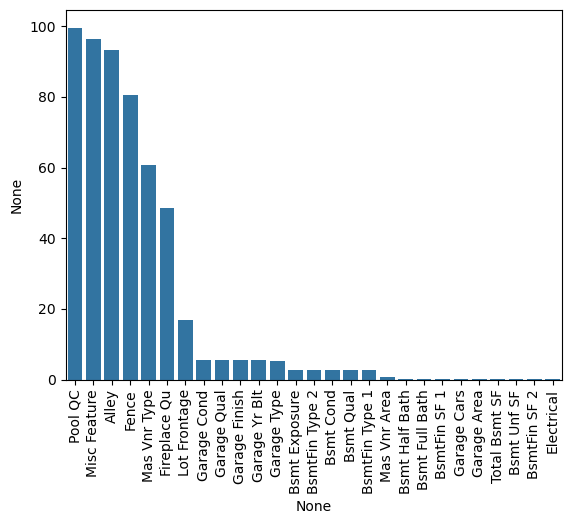

In [24]:
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [25]:
p_nan[p_nan < 1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

In [26]:
df[df["Total Bsmt SF"].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1341           20        RM          99.0      5940   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1341          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1341          NaN        0       4     2008      ConLD         Abnorml   

      SalePrice  
1341      79000  

[1 rows x 80 columns]

In [27]:
df[df["Bsmt Full Bath"].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1341           20        RM          99.0      5940   Pave   NaN       IR1   
1497           20        RL         123.0     47007   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1341          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   
1497          Lvl    AllPub     Inside  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1341          NaN        0       4     2008      ConLD         Abnorml   
1497          NaN        0       7     2008        WD           Normal   

      SalePrice  
1341      79000  
1497     284700  

[2 rows x 80 columns]

數值型地下室欄位包括：

- BsmtFin SF 1：地下室完成面積 1
- BsmtFin SF 2：地下室完成面積 2
- Bsmt Unf SF：地下室未完成面積
- Total Bsmt SF：總地下室面積
- Bsmt Full Bath：地下室全浴室數量
- Bsmt Half Bath：地下室半浴室數量

In [28]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [29]:
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Cond          2.733174
Bsmt Qual          2.733174
Mas Vnr Area       0.785787
Electrical         0.034165
Garage Cars        0.034165
Garage Area        0.034165
dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [31]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna("None")

In [32]:
p_nan = percent_missing(df)
p_nan

Pool QC          99.590024
Misc Feature     96.412709
Alley            93.235395
Fence            80.457807
Mas Vnr Type     60.642296
Fireplace Qu     48.582166
Lot Frontage     16.740690
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Garage Type       5.363854
Mas Vnr Area      0.785787
Electrical        0.034165
Garage Cars       0.034165
Garage Area       0.034165
dtype: float64

In [33]:
df.dropna(axis=0,subset=["Electrical","Garage Cars"],inplace=True)

In [34]:
p_nan = percent_missing(df)
p_nan

Pool QC          99.589744
Misc Feature     96.410256
Alley            93.230769
Fence            80.478632
Mas Vnr Type     60.615385
Fireplace Qu     48.547009
Lot Frontage     16.752137
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Garage Type       5.367521
Mas Vnr Area      0.786325
dtype: float64

In [35]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

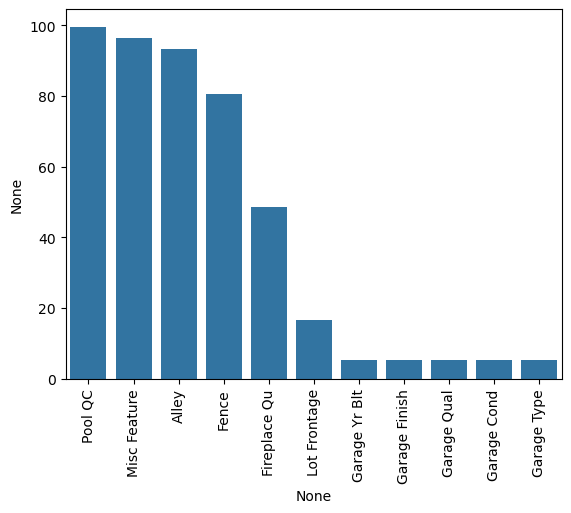

In [37]:
p_nan = percent_missing(df)
sns.barplot(x=p_nan.index,y=p_nan)
plt.xticks(rotation=90)
plt.show()

In [38]:
df[["Garage Type","Garage Finish","Garage Qual","Garage Cond"]]

Garage Type Garage Finish Garage Qual Garage Cond
0         Attchd           Fin          TA          TA
1         Attchd           Unf          TA          TA
2         Attchd           Unf          TA          TA
3         Attchd           Fin          TA          TA
4         Attchd           Fin          TA          TA
...          ...           ...         ...         ...
2922      Detchd           Unf          TA          TA
2923      Attchd           Unf          TA          TA
2924         NaN           NaN         NaN         NaN
2925      Attchd           RFn          TA          TA
2926      Attchd           Fin          TA          TA

[2925 rows x 4 columns]

In [39]:
df[["Garage Yr Blt"]]

Garage Yr Blt
0            1960.0
1            1961.0
2            1958.0
3            1968.0
4            1997.0
...             ...
2922         1984.0
2923         1983.0
2924            NaN
2925         1975.0
2926         1993.0

[2925 rows x 1 columns]

In [41]:
gar_str_clos = ["Garage Type","Garage Finish","Garage Qual","Garage Cond"]
df[gar_str_clos] = df[gar_str_clos].fillna("None")

In [42]:
df[["Garage Yr Blt"]] = df[["Garage Yr Blt"]].fillna(0)


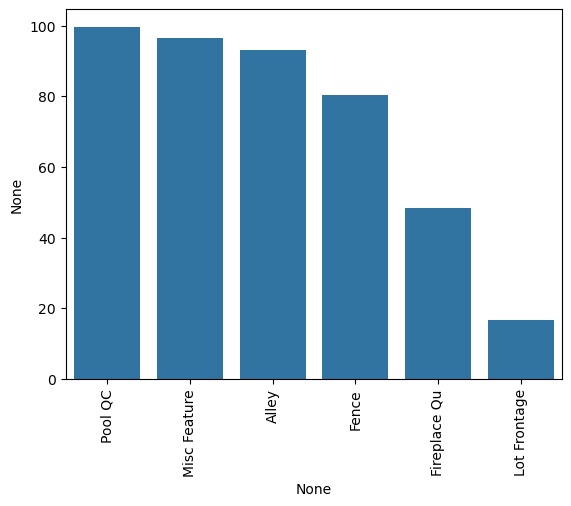

In [43]:
p_nan = percent_missing(df)
sns.barplot(x=p_nan.index,y=p_nan)
plt.xticks(rotation=90)
plt.show()

In [44]:
p_nan = percent_missing(df)
p_nan

Pool QC         99.589744
Misc Feature    96.410256
Alley           93.230769
Fence           80.478632
Fireplace Qu    48.547009
Lot Frontage    16.752137
dtype: float64

In [45]:
df = df.drop(["Pool QC","Misc Feature","Alley","Fence"],axis=1)

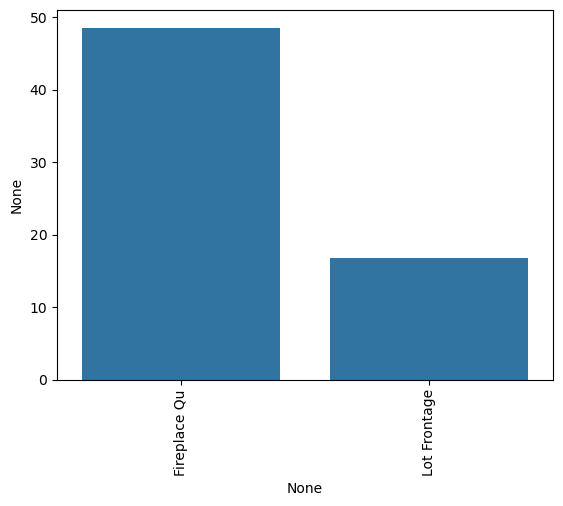

In [46]:
p_nan = percent_missing(df)
sns.barplot(x=p_nan.index,y=p_nan)
plt.xticks(rotation=90)
plt.show()

In [48]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

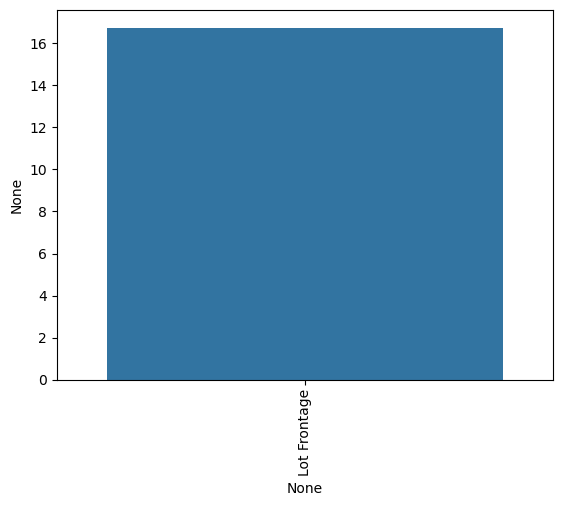

In [49]:
p_nan = percent_missing(df)
sns.barplot(x=p_nan.index,y=p_nan)
plt.xticks(rotation=90)
plt.show()

Lot Frontage  通常指的是房屋正面與街道的距離

這些名字代表的是阿姆斯市（Ames, Iowa）內的不同社區或鄰里。在房地產數據中，`Neighborhood` 指的是房產所在的地理位置，每個名稱代表一個特定的區域。這些不同的社區可能會有不同的房價、地段特性、居民組成以及生活設施等特點。

以下是一些具體的鄰里名稱和可能的簡介：

- **NAmes**: 通常是指 North Ames，可能是位於阿姆斯北部的一個住宅區。
- **Gilbert**: 可能是一個以家庭為主的社區。
- **StoneBr**: 簡稱 Stone Bridge，可能是一個較新的或高檔的住宅區。
- **NWAmes**: 指 Northwest Ames，指的是阿姆斯西北部的一個區域。
- **Somerst**: 可能指的是 Somerst 社區，這是一個受歡迎的住宅區。
- **BrDale**: 可能是 Brookdale 的縮寫，指的是一個特定的住宅區。
- **NPkVill**: North Park Village 的縮寫，可能是一個小型社區。
- **NridgHt**: Northridge Heights 的縮寫，通常是高檔住宅區。
- **Blmngtn**: Bloomington 的縮寫，可能是一個家庭型社區。
- **NoRidge**: North Ridge，一個可能擁有優越景觀的區域。
- **SawyerW**: Sawyer West，Sawyer 社區的一部分。
- **Sawyer**: 一個可能中等價位的住宅區。
- **Greens**: 可能是一個小型或專門的住宅區。
- **BrkSide**: Brookside，可能是一個歷史悠久的區域。
- **OldTown**: 老城區，通常是城市的老區域，有很多歷史建築。
- **IDOTRR**: Interstate Department of Transportation Railroad，可能是一個靠近鐵路的工業區。
- **ClearCr**: Clear Creek，一個可能靠近溪流的自然美景區。
- **SWISU**: South West Iowa State University，靠近愛荷華州立大學的西南部。
- **Edwards**: 可能是以開發者或地區歷史人物命名的社區。
- **CollgCr**: College Creek，可能是學生或大學教職工居住的區域。
- **Crawfor**: Crawford，可能是一個以家庭為主的社區。
- **Blueste**: Bluestem，可能是一個新開發的住宅區。
- **Mitchel**: 可能是一個家庭型社區。
- **Timber**: 可能是一個擁有豐富樹木的區域。
- **MeadowV**: Meadow Village，一個可能有開放空間的社區。
- **Veenker**: 可能是一個以高檔住宅為主的社區。
- **GrnHill**: Green Hill，可能是一個綠化很好的區域。
- **Landmrk**: Landmark area，一個可能具有地標性的區域。

這些社區的名稱有助於了解房產所處的位置和社區特色.

In [50]:
df["Neighborhood"].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [52]:
group = df.groupby("Neighborhood")["Lot Frontage"]
list(group)

[('Blmngtn',
  52      43.0
  53      43.0
  468     53.0
  469     51.0
  470     43.0
  471     43.0
  472     43.0
  473     43.0
  1080     NaN
  1081     NaN
  1082    43.0
  1083    43.0
  1084    53.0
  1740    53.0
  1741    53.0
  1742     NaN
  1743    53.0
  2416    43.0
  2417     NaN
  2418     NaN
  2419     NaN
  2420     NaN
  2421     NaN
  2422    43.0
  2423    43.0
  2424    43.0
  2425    53.0
  2426    53.0
  Name: Lot Frontage, dtype: float64),
 ('Blueste',
  298     35.0
  299     35.0
  932     24.0
  933     24.0
  934     24.0
  935     24.0
  1541    24.0
  1542    24.0
  2222    24.0
  2224    35.0
  Name: Lot Frontage, dtype: float64),
 ('BrDale',
  29      21.0
  30      21.0
  31      21.0
  402     21.0
  403     24.0
  404     21.0
  405     21.0
  406     21.0
  407     21.0
  1039    21.0
  1040    21.0
  1041    21.0
  1042    21.0
  1043    21.0
  1044    21.0
  1045    21.0
  1674    21.0
  1675    21.0
  1676    21.0
  1677    24.0
  1678    24.0

In [53]:
group.mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [54]:
df[df["Lot Frontage"].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
11             20        RL           NaN      7980   Pave       IR1   
14            120        RL           NaN      6820   Pave       IR1   
22             60        FV           NaN      7500   Pave       Reg   
23             20        RL           NaN     11241   Pave       IR1   
24             20        RL           NaN     12537   Pave       IR1   
...           ...       ...           ...       ...    ...       ...   
2891           20        RL           NaN     16669   Pave       IR1   
2894           60        RL           NaN     11170   Pave       IR2   
2895           20        RL           NaN      8098   Pave       IR1   
2909           90        RL           NaN     11836   Pave       IR1   
2923           20        RL           NaN      8885   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch  \
11            Lvl    AllPub     Inside        Gtl  ...              0   
14            Lvl    AllPub     Corner        Gtl  ...              0   
22            Lvl    AllPub     Inside        Gtl  ...              0   
23            Lvl    AllPub    CulDSac        Gtl  ...              0   
24            Lvl    AllPub    CulDSac        Gtl  ...              0   
...           ...       ...        ...        ...  ...            ...   
2891          Lvl    AllPub     Corner        Gtl  ...              0   
2894          Lvl    AllPub     Corner        Gtl  ...              0   
2895          Lvl    AllPub     Inside        Gtl  ...              0   
2909          Lvl    AllPub     Corner        Gtl  ...              0   
2923          Low    AllPub     Inside        Mod  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
11            0            0         0      500        3     2010        WD    
14            0          140         0        0        6     2010        WD    
22            0            0         0        0        1     2010        WD    
23            0            0         0      700        3     2010        WD    
24            0            0         0        0        4     2010        WD    
...         ...          ...       ...      ...      ...      ...        ...   
2891          0            0         0        0        1     2006        WD    
2894          0            0         0        0        4     2006        WD    
2895          0            0         0        0       10     2006        WD    
2909          0            0         0        0        3     2006        WD    
2923          0            0         0        0        6     2006        WD    

      Sale Condition SalePrice  
11            Normal    185000  
14            Normal    212000  
22            Normal    216000  
23            Normal    149000  
24            Normal    149900  
...              ...       ...  
2891          Normal    228000  
2894          Normal    250000  
2895          Normal    202000  
2909          Normal    146500  
2923          Normal    131000  

[490 rows x 76 columns]

In [60]:
df["Lot Frontage"] =  group.transform(lambda val:val.fillna(val.mean()))

([0], [Text(0, 0, 'Lot Frontage')])

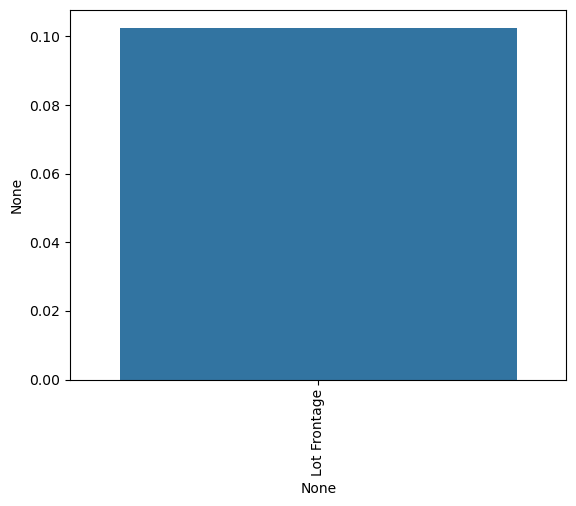

In [61]:
p_nan = percent_missing(df)
p_nan
sns.barplot(x=p_nan.index, y=p_nan)
plt.xticks(rotation=90)

In [62]:
df["Lot Frontage"] = df["Lot Frontage"].fillna(0)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

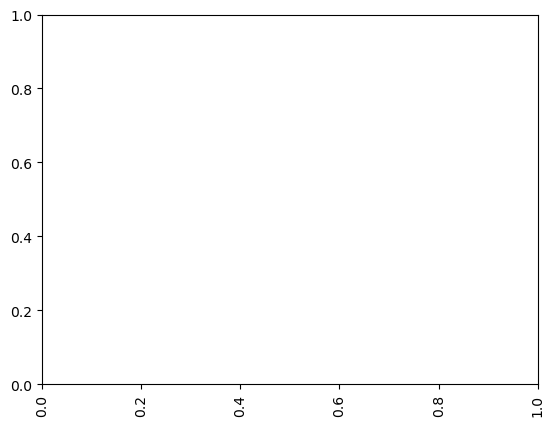

In [63]:
p_nan = percent_missing(df)
p_nan
sns.barplot(x=p_nan.index, y=p_nan)
plt.xticks(rotation=90)

### 為什麼需要 OneHotEncoder

1. **轉換類別變數**：
   - 類別變數不能直接用於大多數機器學習模型，需要將其轉換為數值型。
   - OneHotEncoder 將每個類別變數轉換為多個二進位變數，使模型能夠理解並利用這些特徵。

2. **避免引入順序關係**：
   - 將類別變數轉換為數字（如使用 LabelEncoder）可能會引入不必要的順序關係，而 OneHotEncoder 避免了這一點。
   - 保證了每個類別之間的獨立性，不會因為數值大小而影響模型的預測。

3. **提高模型性能**：
   - 對於很多模型來說，使用 OneHotEncoder 編碼後的特徵可以提高模型的性能，因為它能更好地表示數據的結構和模式。

原始資料如下:


### 原始資料

|    | Color |
|----|-------|
| 0  | Red   |
| 1  | Green |
| 2  | Blue  |
| 3  | Green |
| 4  | Red   |

### 把顏色對應到數字(LabelEncoder) 結果

|    | Color | Color_Label |
|----|-------|-------------|
| 0  | Red   | 2           |
| 1  | Green | 1           |
| 2  | Blue  | 0           |
| 3  | Green | 1           |
| 4  | Red   | 2           |

### OneHotEncoder 結果

|    | Color | Color_Red | Color_Green | Color_Blue |
|----|-------|-----------|-------------|------------|
| 0  | Red   | 1         | 0           | 0          |
| 1  | Green | 0         | 1           | 0          |
| 2  | Blue  | 0         | 0           | 1          |
| 3  | Green | 0         | 1           | 0          |
| 4  | Red   | 1         | 0           | 0          |

## LabelEncoder 

#### 將類別標籤轉換為數字編碼，適用於有順序關係的類別變數。

In [64]:
import pandas as pd

# 建立資料框
data = pd.DataFrame({
    'Fruits': ['Apple', 'Banana', 'Cherry', 'Kewi'],
})
fruit_mappin = {"Apple":1,"Banana":2,"Cherry":3,"Kewi":4}
data["Fruit_number1"] = data["Fruits"].map(fruit_mappin)
data["Fruit_number2"] = data["Fruits"].apply(lambda x:fruit_mappin[x])
data

Fruits  Fruit_number1  Fruit_number2
0   Apple              1              1
1  Banana              2              2
2  Cherry              3              3
3    Kewi              4              4